DBSCAN from scratch

In [1]:
def dist(x:list,y:list)->float:
    pass
    d=0
    for i,j in zip(x,y):
        d+=abs(i-j)
    return d

In [2]:
def dist_mat_(points):
    n=len(points)
    dist_mat=[ [None]*n for _ in points ]

    for i in range(n):
        for j in range(n):
            dist_mat[i][j] = dist(points[i],points[j])

    return dist_mat

In [3]:
datapoints = [
    (1,1), (1,2), (5,7), 
    (3,1), (3,3), (6,6), 
    (18,4),(18,3),(7,6), 
    (4,3), (4,7), (2,2), 
    (8,6), (8,7), (9,6)
]

In [ ]:
def DBscan_scratch(points, eps = 2.0, minpt = 3, return_labels = False):
    dm = dist_mat_(points)
    labels = ['P' + str(i) for i in range(1, len(points) + 1)]

    table = {}
    l = len(dm)
    core = []
    core_points = []

    for i in range(l):
        table[labels[i]] = [[], 1, -1]  # [neighbors, count, status]
        for j in range(l):
            if i != j and dm[i][j] <= eps:
                table[labels[i]][0].append(labels[j])  # Append neighbors
                table[labels[i]][1] += 1  # Increment neighbor count
        
        if table[labels[i]][1] >= minpt:
            core.append(labels[i])
            core_points.append(points[i])
            table[labels[i]][2] = 1  
    border = []
    border_points = []
    outlier = []
    outlier_points = []

    for k, v in table.items():
        if v[2] != 1: 
            is_border = False
            for neighbor in v[0]:  
                if neighbor in core:
                    table[k][2] = 0  # Mark as border point
                    border.append(k)
                    border_points.append(points[labels.index(k)]) 
                    is_border = True
                    break
            if not is_border:
                outlier.append(k)
                outlier_points.append(points[labels.index(k)])

    if return_labels:
        return core, border, outlier

    return core_points, border_points, outlier_points

c,b,o=DBscan_scratch(datapoints)
# ta=DBscan_scratch(datapoints)

In [13]:
c,b,o

([(1, 1),
  (1, 2),
  (5, 7),
  (3, 1),
  (3, 3),
  (6, 6),
  (7, 6),
  (2, 2),
  (8, 6),
  (8, 7),
  (9, 6)],
 [],
 [(18, 4), (18, 3), (4, 3), (4, 7)])

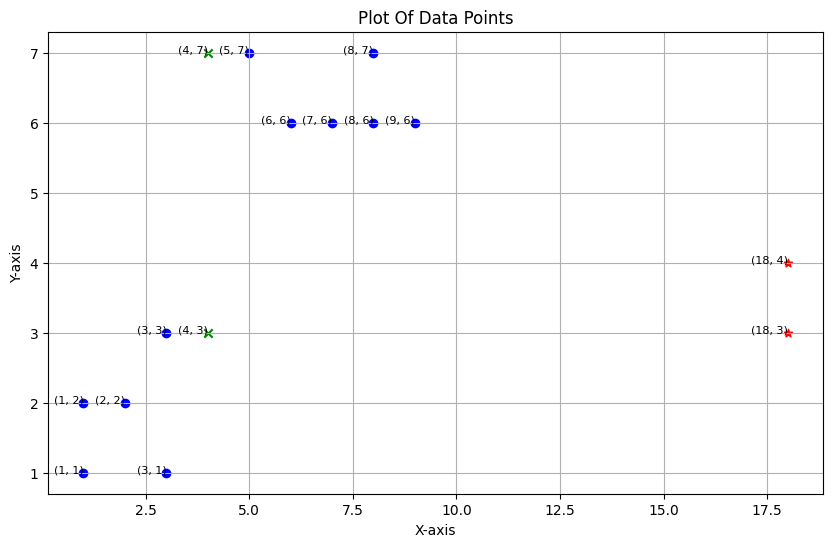

In [ ]:
import matplotlib.pyplot as plt

# labels = ['p'+str(i) for i in range(1,len(datapoints))]

x = [point[0] for point in c]
y = [point[1] for point in c]

x_ = [point[0] for point in b]
y_ = [point[1] for point in b]

x__ = [point[0] for point in o]
y__ = [point[1] for point in o]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue',marker='o')

plt.scatter(x_, y_, color='green',marker='x')

plt.scatter(x__, y__, color='red',marker='*')


for (x_val, y_val),label in zip(c,c):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')
for (x_val, y_val),label in zip(b,b):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')
for (x_val, y_val),label in zip(o,o):
    plt.text(x_val, y_val, label,fontsize=8, ha='right')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of data points'.title())

plt.grid(True)
plt.show()

DBSCAN using Library (iris data)

In [16]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [17]:
# iris = pd.DataFrame( load_iris().data,columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
data = load_iris().data 



In [18]:
dbscan = DBSCAN(eps=2,min_samples=3)
dbscan.fit(data)

DBSCAN(eps=2, min_samples=3)

In [19]:
labels = dbscan.labels_


# data_df = pd.DataFrame(data, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
# data_df['cluster'] = labels

# 10
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
core_indices = dbscan.core_sample_indices_
core_points = data[core_indices]
outlier_points = data[labels == -1]
border_points = data[(labels != -1) & (labels != labels[core_indices])]

In [35]:
print(core_points[:5])
print(border_points)
print(outlier_points)

print(len(core_points))
print(len(border_points))
print(len(outlier_points))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[]
[]
150
0
0


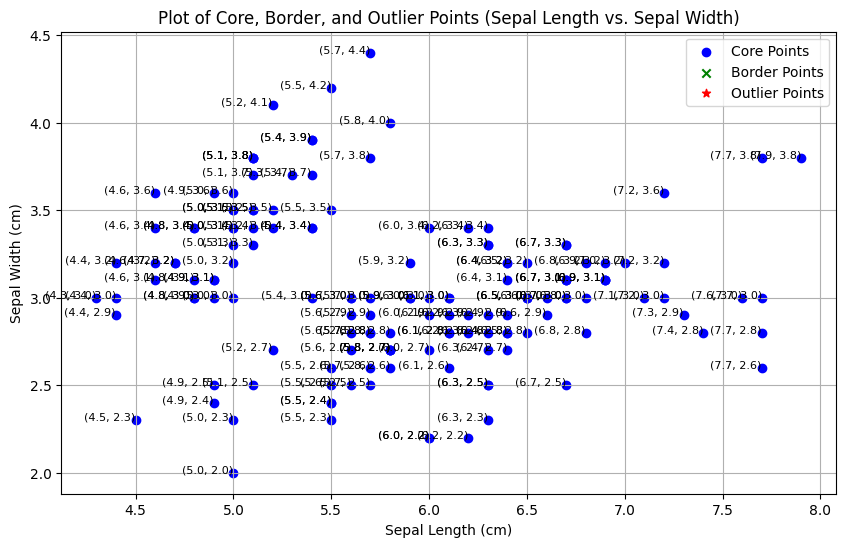

In [37]:
import matplotlib.pyplot as plt


x_core = [point[0] for point in core_points] 
y_core = [point[1] for point in core_points]  

x_border = [point[0] for point in border_points]
y_border = [point[1] for point in border_points]

x_outlier = [point[0] for point in outlier_points]
y_outlier = [point[1] for point in outlier_points]

plt.figure(figsize=(10, 6))
plt.scatter(x_core, y_core, color='blue', label='Core Points',marker='o')
plt.scatter(x_border, y_border, color='green', label='Border Points',marker='x')
plt.scatter(x_outlier, y_outlier, color='red', label='Outlier Points',marker='*')

for (x_val, y_val) in zip(x_core, y_core):
    plt.text(x_val, y_val, f"({round(x_val, 2)}, {round(y_val, 2)})", fontsize=8, ha='right')

for (x_val, y_val) in zip(x_border, y_border):
    plt.text(x_val, y_val, f"({round(x_val, 2)}, {round(y_val, 2)})", fontsize=8, ha='right')

for (x_val, y_val) in zip(x_outlier, y_outlier):
    plt.text(x_val, y_val, f"({round(x_val, 2)}, {round(y_val, 2)})", fontsize=8, ha='right')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Plot of Core, Border, and Outlier Points (Sepal Length vs. Sepal Width)')

plt.grid(True)
plt.legend()

# Show the plot
plt.show()
